In [37]:
import matplotlib.pyplot as plt
import numpy as np
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity



In [5]:
mu = 1
sigma = 0.02
n_draws = 1000

In [23]:
M = np.random.normal(mu, sigma, size = n_draws )
chi = np.random.uniform(0,1, size = n_draws)
M_irr = M * ((1+(1-chi**2)**0.5)/2)**0.5

## binning with Freedman-Diaconis rule

1.047852300475048 0.7189982606697631


(array([0.30408628, 0.30408628, 0.42572079, 1.2163451 , 0.72980706,
        1.27716236, 1.2163451 , 1.88533491, 2.00696942, 2.12860393,
        2.49350746, 2.31105569, 3.58821805, 5.4127357 , 6.02090825,
        9.42667453, 9.60912629, 6.50744629, 3.04086275, 0.91225883]),
 array([0.71899826, 0.73544096, 0.75188366, 0.76832637, 0.78476907,
        0.80121177, 0.81765447, 0.83409717, 0.85053988, 0.86698258,
        0.88342528, 0.89986798, 0.91631068, 0.93275339, 0.94919609,
        0.96563879, 0.98208149, 0.99852419, 1.0149669 , 1.0314096 ,
        1.0478523 ]),
 <BarContainer object of 20 artists>)

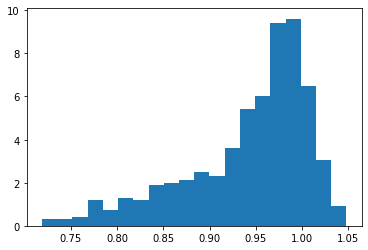

In [32]:
sigmaG = astroMLstats.sigmaG(M_irr)
binsize = 2.7*sigmaG/(n_draws**(1/3))
#print(max(M_irr), min(M_irr))
n_bins = int((max(M_irr)-min(M_irr))/binsize)

plt.hist(M_irr, bins = n_bins, density = True)

## binning with Scott's rule

(array([0.29800455, 0.29800455, 1.14944612, 0.93658573, 1.53259483,
        1.87317145, 1.95831561, 2.46918055, 3.19290589, 4.98093319,
        7.96097868, 9.53614559, 5.02350526, 1.36230651]),
 array([0.71899826, 0.74248783, 0.76597741, 0.78946698, 0.81295656,
        0.83644613, 0.85993571, 0.88342528, 0.90691485, 0.93040443,
        0.953894  , 0.97738358, 1.00087315, 1.02436273, 1.0478523 ]),
 <BarContainer object of 14 artists>)

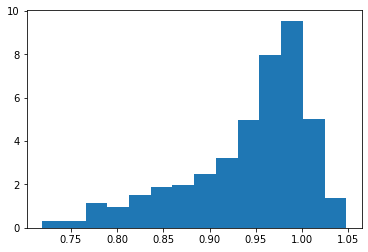

In [36]:
sigma = np.std(M_irr)
binsize = 3.5*sigma/(n_draws**(1/3))
#print(max(M_irr), min(M_irr))
n_bins_scott = int((max(M_irr)-min(M_irr))/binsize)
plt.hist(M_irr, bins = n_bins_scott, density = True)

# now using KDE

In [ ]:
xgrid = np.linspace(x.min(),x.max(),1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)
#questa copiataaaa, modificaaa